<a href="https://colab.research.google.com/github/lingchm/datascience/blob/master/exercises/B_GBM%20Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from xgboost import plot_importance, plot_tree
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')

## Example 1. Synthetic Dataset

We use a simple example to illustrate the sequential learning of each iteration in XGBoost

In [ ]:
# gerenrate data
x = np.arange(0,50)
# just random uniform distributions in differnt range
y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)
y = np.concatenate((y1,y2,y3,y4,y5))

Text(0.5,1,'To Fit A Model That Predict Y From X')

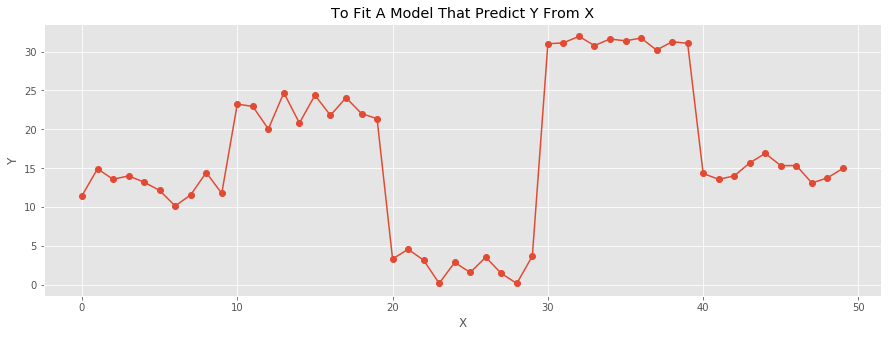

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(x, y, 'o-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('To Fit A Model That Predict Y From X')

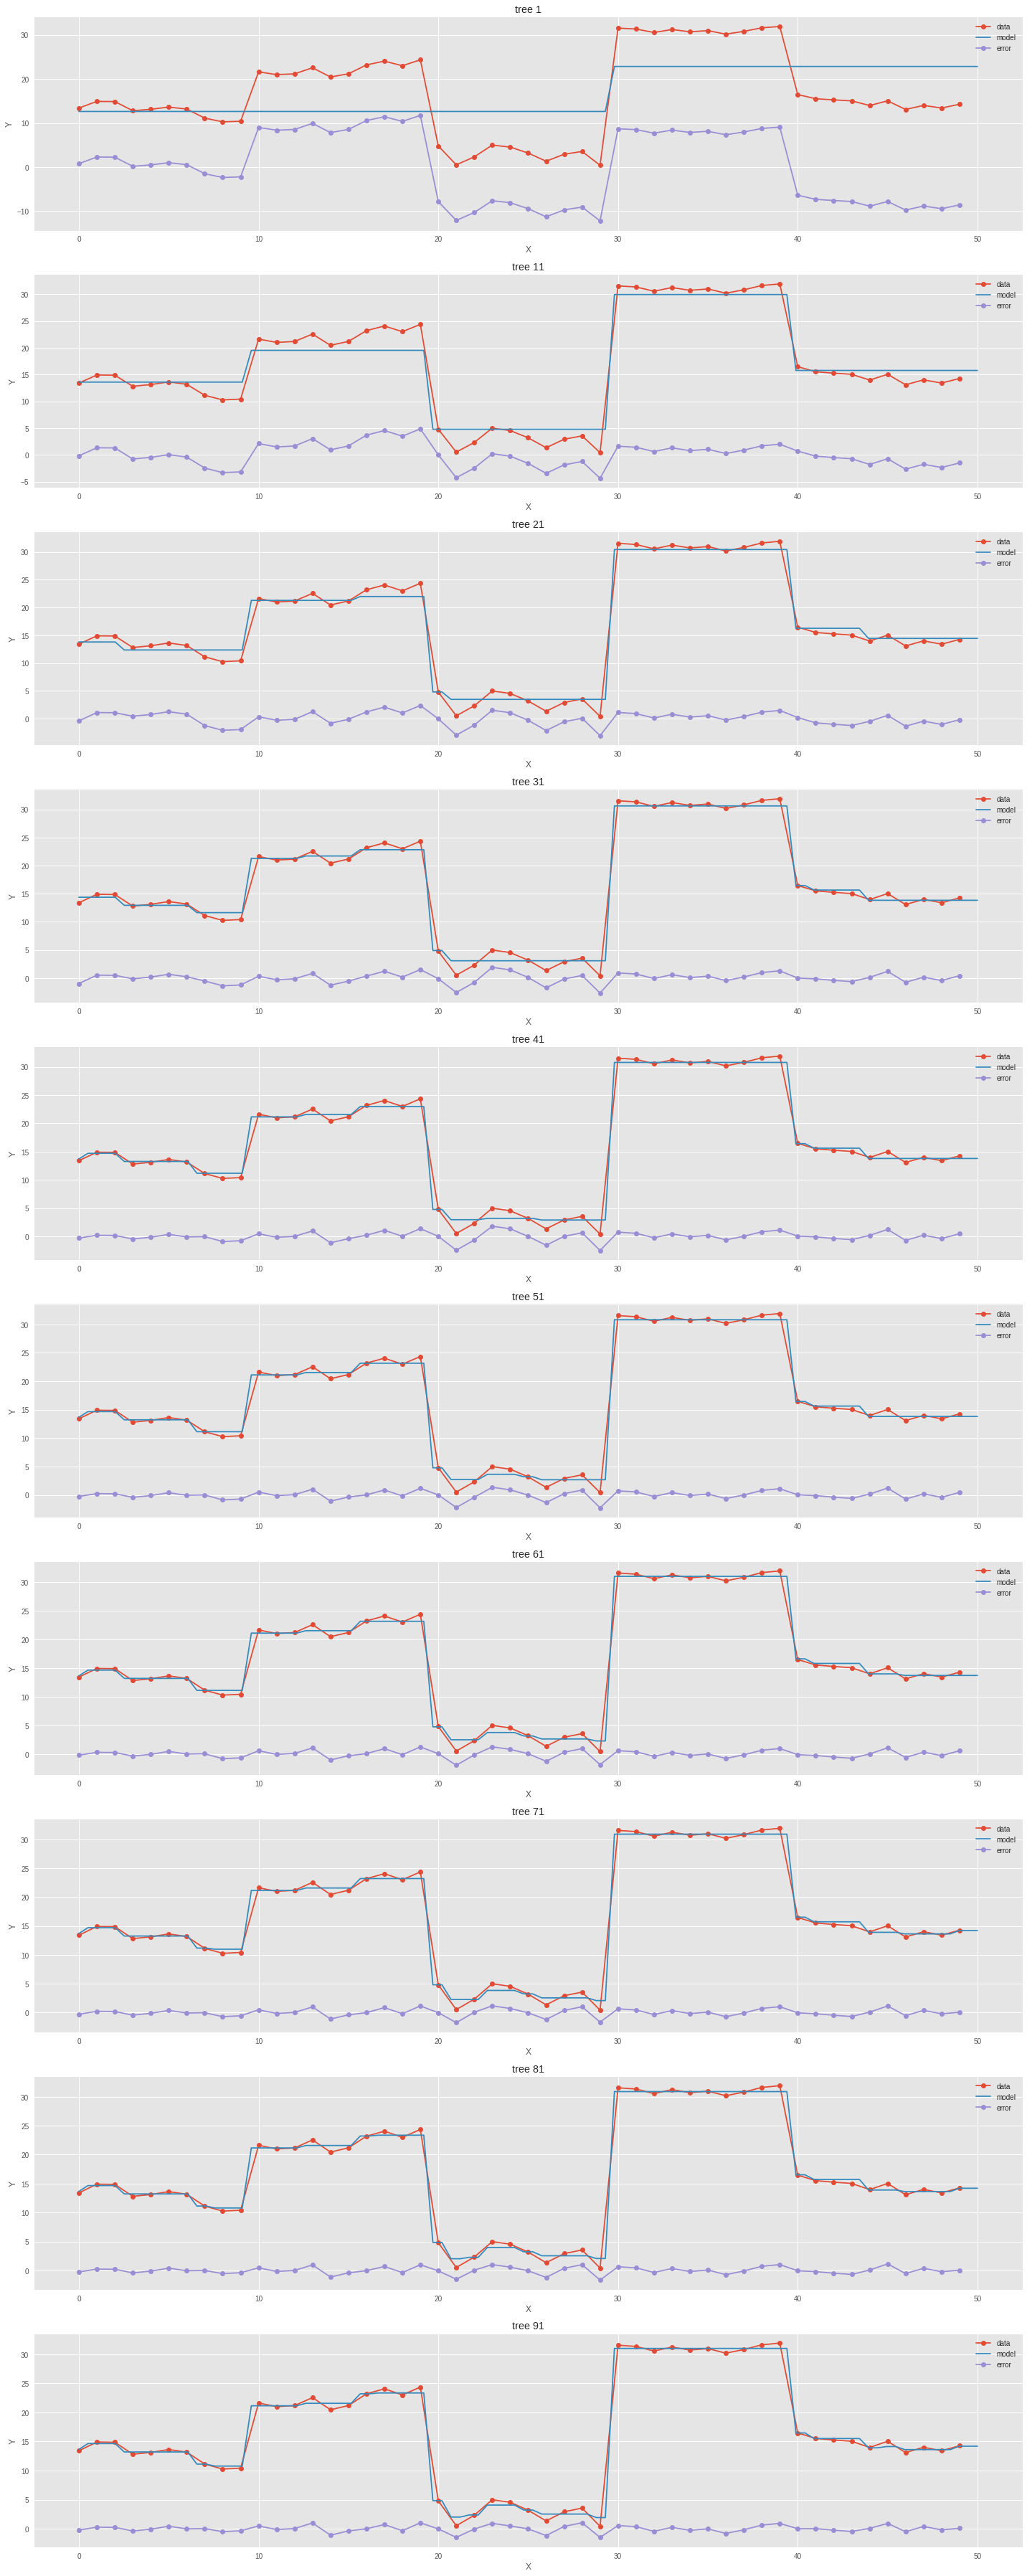

In [ ]:
X = x.reshape(-1, 1)
plt.rcParams['figure.figsize'] = 20, 50
trees = []
err = y
plot_num = 1
for i in xrange(100):
    est = DecisionTreeRegressor(max_leaf_nodes=2)
    est.fit(X, err)
    trees.append(est)
    y_pred = np.sum([e.predict(X) for idx, e in enumerate(trees)], axis=0)
    err = y - y_pred
    #err = np.array([1 if v > 0 else (-1 if v < 0 else 0) for v in (y - y_pred)])
    if i % 10 == 0:
        plt.subplot(10, 1, plot_num)
        plot_num += 1
        tx = np.linspace(0, 50, 100)
        ty = np.sum([e.predict(tx.reshape(-1, 1)) for e in trees], axis=0)
        plt.plot(x, y, 'o-', label = 'data')
        plt.plot(tx, ty, label='model')
        plt.plot(X, err, 'o-', label='error')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('tree %d' % (i+1))
        _ = plt.legend()
plt.tight_layout()


## Example 2. Classification

In [ ]:
# prepare data
iris = load_iris()
#print(iris.DESCR)
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Three types of XGBoost parameters:
* General parameters 
* Booster parameters
* Task parameters

In [ ]:
# define model parameters
params = {
        'booster': 'gbtree',          # gbtree or glinear, choice of the base classifier 
        'objective': 'multi:softmax',  # softmax is used for multiclass classification
        'num_class': 3,
        'gamma': 0.1,                 # min reduction of loss needed for each split, the larger, the more conservative
        'max_depth': 6,               # max depth of each tree
        'lambda': 2,                # l2 penalty
        'subsample': 0.7,           # proportion of samples used in sampling
        'colsample_bytree': 0.7,    # proportion of features used  
        'min_child_weight': 3,      # larger value prevents the effect of outlier samples; 
        'silent': 0,
        'eta': 0.1,                 # shrinkage parameter to avoid overfitting
        'seed': 1000,
        'nthread': 4,               # threads used in processing  
}

plst = params.items()
num_rounds = 500

accuarcy: 96.67%


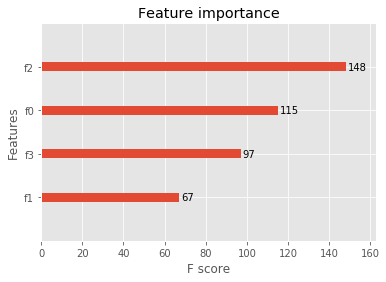

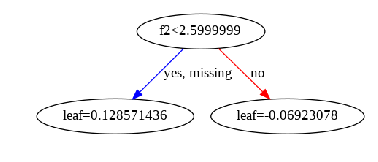

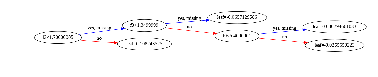

In [ ]:
# train
dtrain = xgb.DMatrix(X_train, y_train) # form data matrix
model = xgb.train(plst, dtrain, num_rounds)

# predict
dtest = xgb.DMatrix(X_test)
y_pred = model.predict(dtest)

# evaluate
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy: %.2f%%" % (accuracy*100.0))
plot_importance(model)
plt.show()

# visualize details
plot_tree(model, num_trees=0) # plot the decison tree for the 0-th tree, specify num_trees = n to show n-th tree
plot_tree(model, num_trees=5, rankdir = 'LR') # 5-th tree, layout: from left to right


## Example 3. Regression

In [ ]:
# load data
boston = load_boston()
# print(boston.DESCR)
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
params = {
        'booster': 'gbtree',
        'objective': 'reg:gamma',
        'gamma': 0.1,
        'max_depth': 5,
        'lambda': 3,
        'subsample': 0.7,
        'colsample_bytree': 0.7,
        'min_child_weight': 3,
        'silent': 1,
        'eta': 0.1,
        'seed': 1000,
        'nthread': 4,
    }
num_rounds = 300

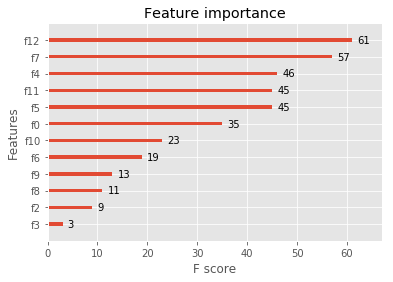

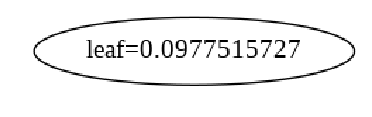

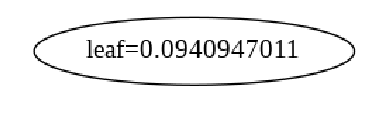

In [ ]:
# train
dtrain = xgb.DMatrix(X_train, y_train)
plst = params.items()
model = xgb.train(plst, dtrain, num_rounds)

# predict
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)
plot_importance(model)
plt.show()

plot_tree(model, num_trees=0) # plot the decison tree for the 0-th tree, specify num_trees = n to show n-th tree
plot_tree(model, num_trees=10, rankdir = 'LR') # 5-th tree, layout: from left to right


# LightGBM

In [30]:
import datetime
import lightgbm as lgb
import pandas as pd
from sklearn import datasets

In [31]:
# read in data
breast = datasets.load_breast_cancer()
df = pd.DataFrame(breast.data,columns = [x.replace(' ','_') for x in breast.feature_names])
df['label'] = breast.target
df['mean_radius'] = df['mean_radius'].apply(lambda x:int(x))
df['mean_texture'] = df['mean_texture'].apply(lambda x:int(x))
dftrain,dftest = train_test_split(df)

categorical_features = ['mean_radius','mean_texture']
lgb_train = lgb.Dataset(dftrain.drop(['label'],axis = 1),label=dftrain['label'],
                        categorical_feature = categorical_features)

lgb_valid = lgb.Dataset(dftest.drop(['label'],axis = 1),label=dftest['label'],
                        categorical_feature = categorical_features,
                        reference=lgb_train)

In [32]:
# define params
boost_round = 50                   
early_stop_rounds = 10

params = {
    'boosting_type': 'gbdt',
    'objective':'binary',
    'metric': ['auc'],
    'num_leaves': 31,   
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [33]:
# training model
results = {}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round= boost_round,
                valid_sets=(lgb_valid, lgb_train),
                valid_names=('validate','train'),
                early_stopping_rounds = early_stop_rounds,
                evals_result= results)

/usr/local/lib/python2.7/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python2.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1]	train's auc: 0.97742	validate's auc: 0.959531
Training until validation scores don't improve for 10 rounds.
[2]	train's auc: 0.97742	validate's auc: 0.959531
[3]	train's auc: 0.979934	validate's auc: 0.967033
[4]	train's auc: 0.983553	validate's auc: 0.96735
[5]	train's auc: 0.984187	validate's auc: 0.984996
[6]	train's auc: 0.988663	validate's auc: 0.984996
[7]	train's auc: 0.99093	validate's auc: 0.987003
[8]	train's auc: 0.991295	validate's auc: 0.987954
[9]	train's auc: 0.991471	validate's auc: 0.988588
[10]	train's auc: 0.991729	validate's auc: 0.989645
[11]	train's auc: 0.993069	validate's auc: 0.991019
[12]	train's auc: 0.99308	validate's auc: 0.992075
[13]	train's auc: 0.993527	validate's auc: 0.992709
[14]	train's auc: 0.993221	validate's auc: 0.993766
[15]	train's auc: 0.993386	validate's auc: 0.993766
[16]	train's auc: 0.99382	validate's auc: 0.994189
[17]	train's auc: 0.993961	validate's auc: 0.994189
[18]	train's auc: 0.994643	validate's auc: 0.993449
[19]	train's auc:

train accuracy: 0.98357 
valid accuracy: 0.96503 



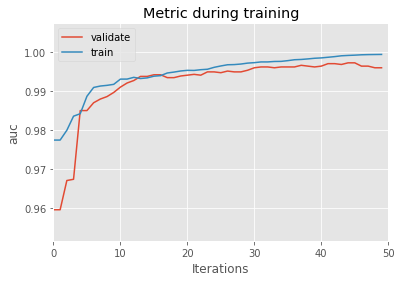

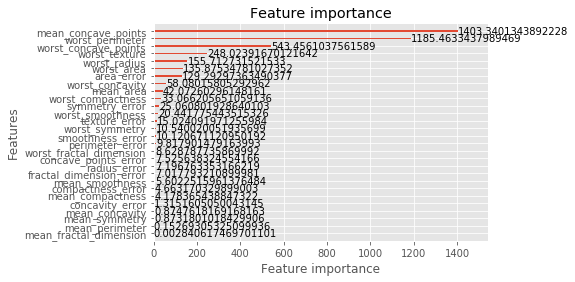

In [34]:
# evaluate model
y_pred_train = gbm.predict(dftrain.drop('label',axis = 1), num_iteration=gbm.best_iteration)
y_pred_test = gbm.predict(dftest.drop('label',axis = 1), num_iteration=gbm.best_iteration)

print('train accuracy: {:.5} '.format(accuracy_score(dftrain['label'],y_pred_train>0.5)))
print('valid accuracy: {:.5} \n'.format(accuracy_score(dftest['label'],y_pred_test>0.5)))

lgb.plot_metric(results)
lgb.plot_importance(gbm,importance_type = "gain")
